# Assignment 1, Applied Machine Learning, Spring 2020
## Bhaskar Ghosh, bg2625

In [0]:
# load the CSV file onto GDrive
from google.colab import drive
drive.mount('/content/gdrive')

In [0]:
import matplotlib.pyplot as plt
import csv
import pandas as pd

In [0]:
file_path = '/content/gdrive/My Drive/Colab Notebooks/AMLData/fire_nrt_V1_96617.csv'
data = pd.read_csv(file_path)


## Question 1
### 1.1
Plotting latitude vs longitude in different ways. The first plot uses matplotlib defaults, the second one uses marker size and alpha to deal with overplotting. The third plot uses hexbin and the last one uses a sample from the dataframe to plot the scatter graph.

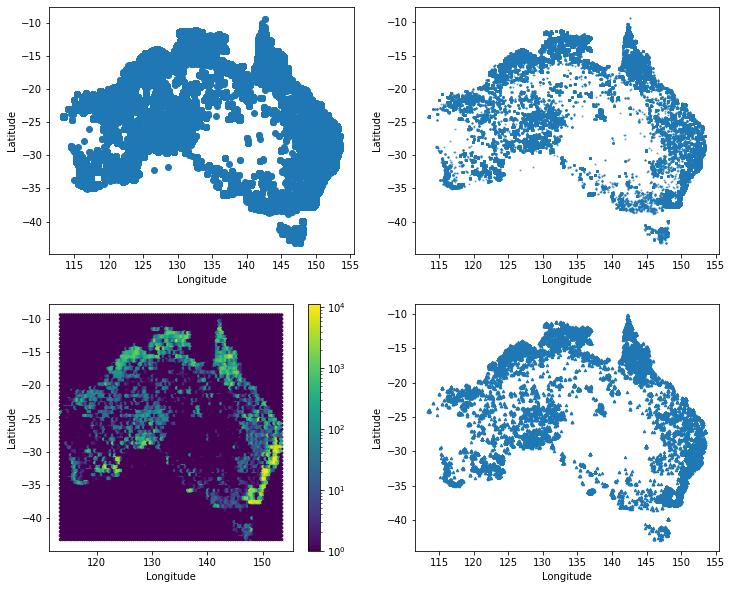

In [0]:
x = data['longitude']
y = data['latitude']

plt.figure(figsize=(12,10))

x_min = min(x)
y_min = min(y)
x_max = max(x)
y_max = max(y)

ax11 = plt.subplot(2, 2, 1)
ax11.set_xlabel('Longitude')
ax11.set_ylabel('Latitude')
ax11.scatter(x, y)

ax21 = plt.subplot(2,2,2)
ax21.set_xlabel('Longitude')
ax21.set_ylabel('Latitude')
ax21.scatter(x, y, marker='.', alpha=0.5, s=5)

ax12 = plt.subplot(2, 2, 3)
ax12.set_xlabel('Longitude')
ax12.set_ylabel('Latitude')
plt.hexbin(x, y, bins='log', extent=(x_min, x_max, y_min, y_max))
plt.colorbar()
# plt.axis("off")

# create random sample from the dataframe
sample = data.sample(frac=0.1)
x_sample = sample['longitude']
y_sample = sample['latitude']
ax22 = plt.subplot(2, 2, 4)
ax22.set_xlabel('Longitude')
ax22.set_ylabel('Latitude')
ax22.scatter(x_sample, y_sample, marker='^', s=6)
plt.show()

###  1.2
Maximum number of fires can be observed on the south-eastern part of Australia. This is evident from the hexbin map.

## Question 2
Plotting the histogram for Brightness I-4 temperatures

Text(0, 0.5, 'Frequency')

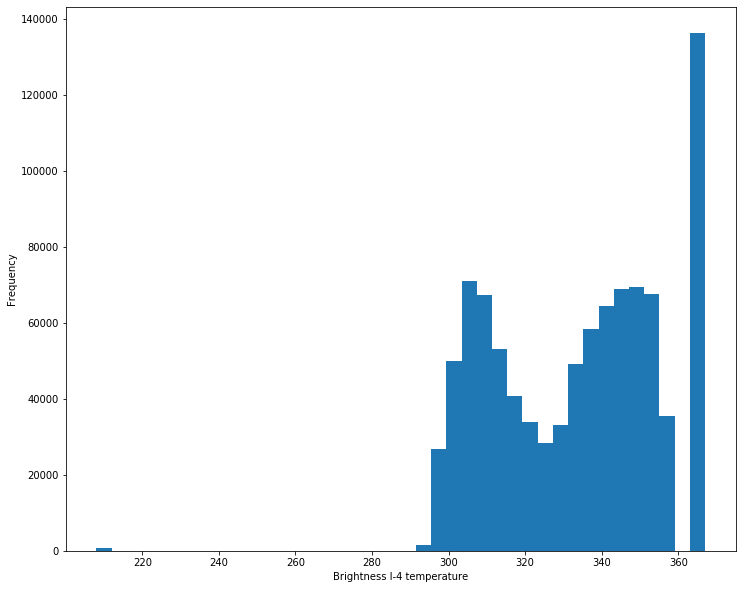

In [0]:
temperatures = data['bright_ti4']
plt.figure(figsize=(12,10))
plt.hist(temperatures, bins=40)
plt.xlabel('Brightness I-4 temperature')
plt.ylabel('Frequency')


### 2.1 
Left: Plot showing areas in Australia where brightness temperature was saturated (as indicated by the last bar on 
the histogram)

Right: Plot showing areas in Australia where brightness temperature was less than the maximum brightness temperature.

We can see from the hexbin plots that distribution for temperatures less than saturation are more densely distributed.

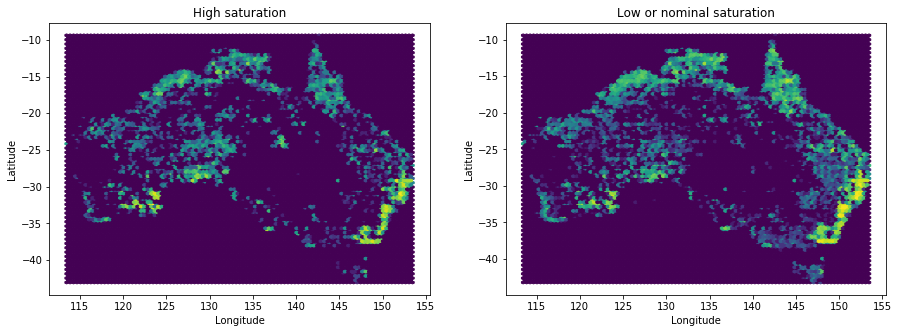

In [14]:
# isolate data points that have highest value for brightness temperature from the rest of the data
max_temp = max(data['bright_ti4'])
high_sat_values = data.loc[data['bright_ti4'] >= max_temp]
x_high = high_sat_values['longitude']
y_high = high_sat_values['latitude']

low_aat_values = data.loc[data['bright_ti4'] < max_temp]
x_low = low_aat_values['longitude']
y_low = low_aat_values['latitude']

plt.figure(figsize=(15,5))
ax11 = plt.subplot(1, 2, 1)
ax11.set_xlabel('Longitude')
ax11.set_ylabel('Latitude')
plt.hexbin(x_high, y_high, bins='log', extent=(min(x_high), max(x_high), min(y_high), max(y_high)))
ax11.set_title('High saturation')

ax12 = plt.subplot(1, 2, 2)
ax12.set_xlabel('Longitude')
ax12.set_ylabel('Latitude')
plt.hexbin(x_low, y_low, bins='log', extent=(min(x_low), max(x_low), min(y_low), max(y_low)))
ax12.set_title('Low or nominal saturation')

plt.show()

### 2.2
Plotting both series on the same axes.

From the map it looks like the concentration of fires is at the aouth-eastern region, but northern and central regions are also affected.

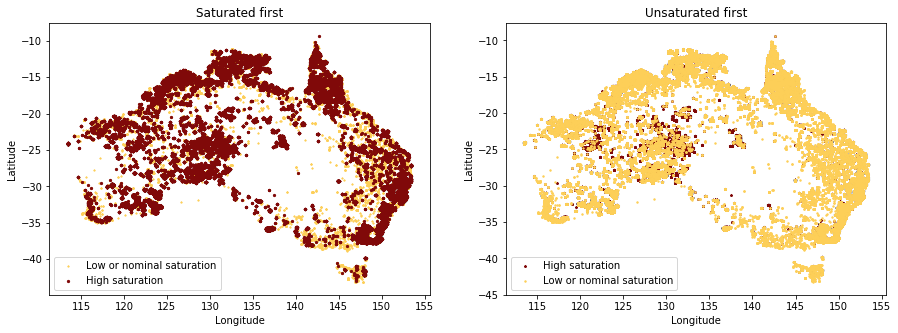

In [19]:
plt.figure(figsize=(15,5))

ax11 = plt.subplot(1, 2, 1)
ax11.scatter(x_low, y_low, marker='*', s=2, c='#fdcf58')
ax11.scatter(x_high, y_high, marker='o', s=5, c='#800909')
ax11.set_xlabel('Longitude')
ax11.set_ylabel('Latitude')
ax11.legend(['Low or nominal saturation', 'High saturation'])
ax11.set_title('Saturated first')

ax12 = plt.subplot(1, 2, 2)
ax12.set_xlabel('Longitude')
ax12.set_ylabel('Latitude')
ax12.scatter(x_high, y_high, marker='*', s=5, c='#800909')
ax12.scatter(x_low, y_low, marker='o', c='#fdcf58', s=2)
ax12.legend(['High saturation', 'Low or nominal saturation'])
ax12.set_title('Unsaturated first')


plt.show()


Points with high saturation temperatures are lower in number than points with lesser temperature. From the plots it is clear that saturated data points should be shown on top of unsaturated points, otherwise it is not possible to observe their impact, as shown in the figure on the right. However, the plot on the left seems to suggest that number of data points with high saturation temperature is higher than low/nominal, which is not true.

### 2.3
Finding a better way to compare the distributions.

One approach is to have the high saturation values on top of low saturation points, but assign low alpha value to the high saturation coordinates. The following figure validates the earlier observation from the hexbin plots that suggested that high saturation temperatures were concentrated in the south-eastern parts of Australia. 

Since the high saturation points are plotted over the low/nominal saturation points, they are more prominent by default. Hence, I have reduced their visual prominence by adding a low alpha value to it. This allows us to visualize both series together wothout a loss of perception about the either set of data and at the same time ensures that we pay attention to the data points which show a high concentration of saturated temperature points (like in the south-eastern region).

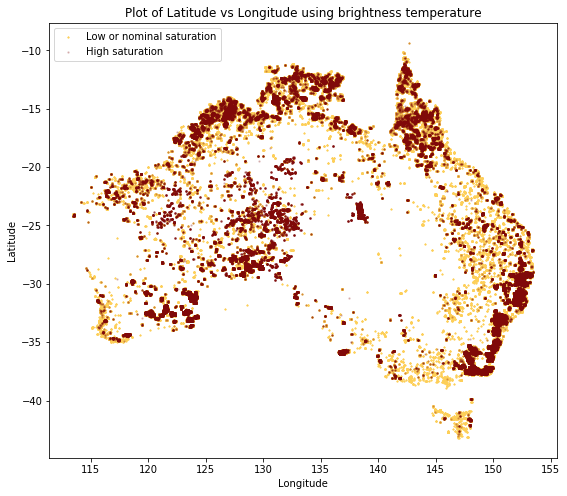

In [20]:
plt.figure(figsize=(20,8))


ax11 = plt.subplot(1, 2, 1)
ax11.scatter(x_low, y_low, marker='*', s=2, c='#fdcf58')
ax11.scatter(x_high, y_high, marker='o', s=2, c='#800909', alpha=0.2)
ax11.set_xlabel('Longitude')
ax11.set_ylabel('Latitude')
ax11.legend(['Low or nominal saturation', 'High saturation'])
ax11.set_title('Plot of Latitude vs Longitude using brightness temperature')
plt.show()